# General Visuals
Python visuals that can be helpful in most data sciecne projects. There is no specific ordering, it's just a repository to quickly grab the plots a I need them.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

### Loading in datasets

In [6]:
cluster_time_series_df = pd.read_csv("datasets/Mtr_A17Shoot_DTW-DPGP-EXP.csv") # Gao's time series data

## Count Plot
Shows the count of labels in a specified column

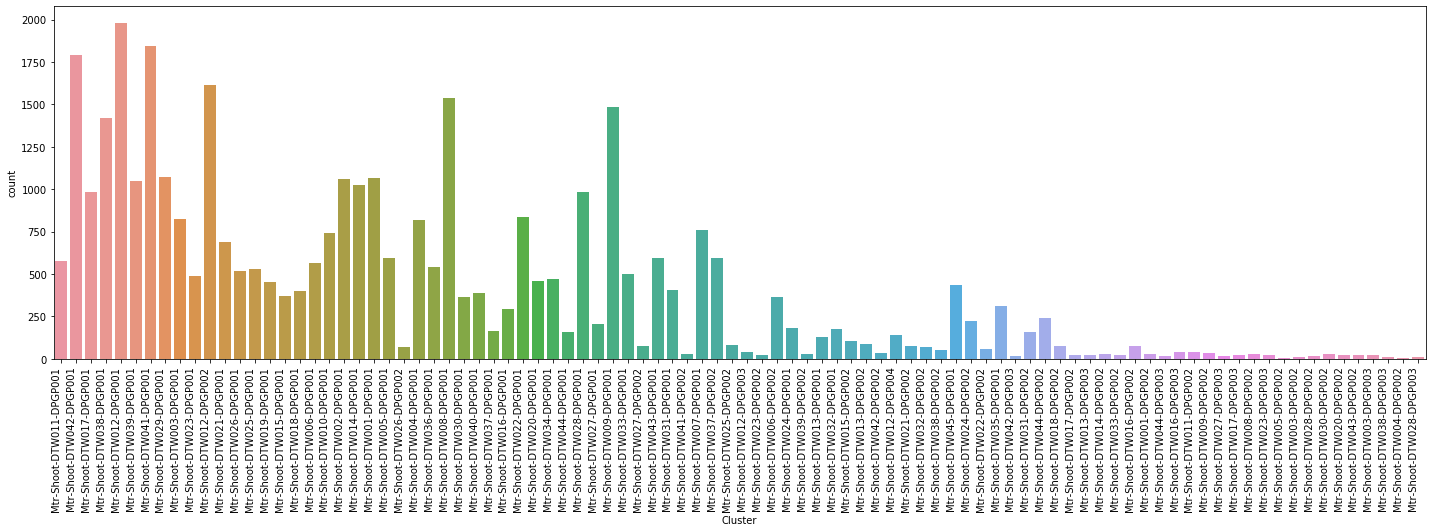

In [7]:
# Count of each label
fig, ax = plt.subplots(figsize=(20,7.5))
sns.countplot(x='Cluster', data=cluster_time_series_df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

## Line Plots - Multiple
Creates random line plots from the data

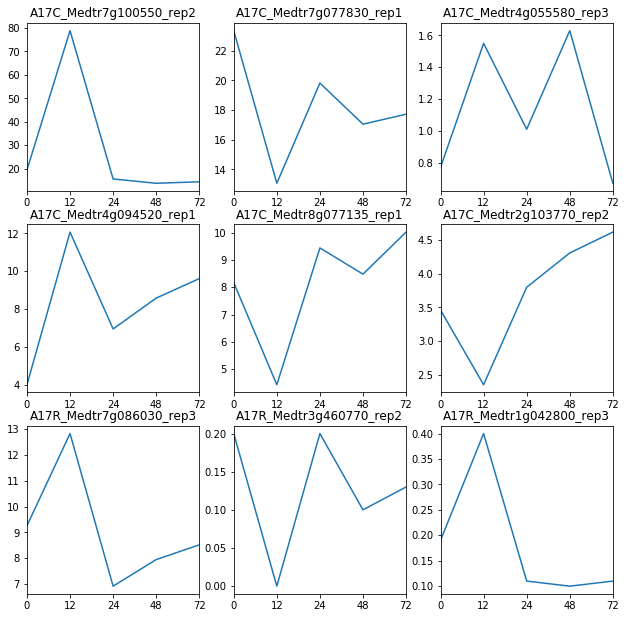

In [15]:
X_time_series = cluster_time_series_df.iloc[:,:-1] # return just the data and not the labels

# Generate random line graphs from the data
rows = 3
cols = 3
plot_size = 3.5

indices = np.random.choice(np.arange(len(X_time_series)), rows * cols)

plt.figure(figsize=(plot_size * cols, plot_size * rows))

for i in range(rows * cols):
    index = indices[i]
    
    ax = plt.subplot(rows, cols, i + 1)
    X_time_series.iloc[index,1:].plot(title=X_time_series.iloc[index][0])
    #plt.imshow(255 - X_train[index], cmap="gray")
    #plt.title("label = %d" % y[index])
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)

## Confusion Matrix
Creates heatmap of confusion matrix. A confusion matrix shows how the predicted values (x-axis) compare to the actual values (y-axis).

In [44]:
y_test = ['blue', 'green',  'red', 'blue', 'green',  'red', 'blue', 'green', 'red']
y_pred = ['blue', 'green',  'red', 'blue', 'green',  'red', 'blue', 'green', 'red']
labels = ['blue', 'green',  'red']

In [45]:
def plot_cm(y_test, y_pred, classes, cbar='False', title="Confusion Matrix", save=False, normalize=False, dpi=320):
    """Compute confusion matrix for the ground truth and predicted labels""" 
    fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
    cnf_matrix = confusion_matrix(y_test, y_pred)
    
    if normalize:
        # Normalize confusion matrix
        cnf_matrix = ((cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis])*100).astype(int)
        np.savetxt("confusion_matrix_lstm_35_clusters.csv", cnf_matrix, delimiter=",")

    
    # plot a heatmap of the confusion matrix
    sns.heatmap(cnf_matrix, annot=True, fmt="d", square=True, xticklabels=classes, yticklabels=classes)
    plt.ylabel("Expected")
    plt.xlabel("Measured")
    plt.title(title)
    if save:
        plt.savefig(str(title) + '.png', dpi=dpi)
    plt.show()

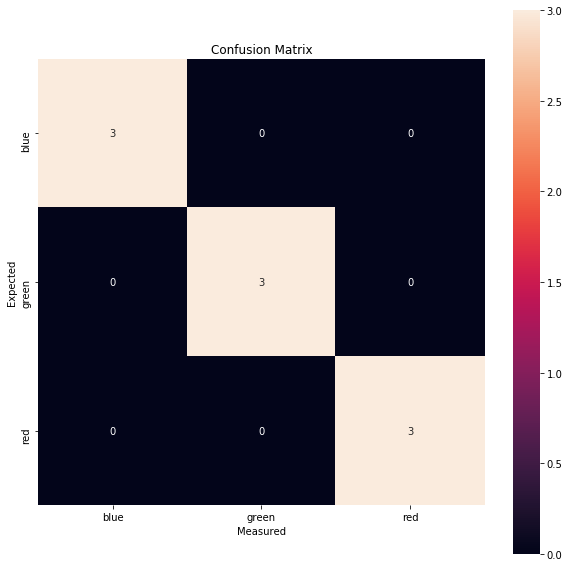

In [46]:
plot_cm(y_test, y_pred, labels, save=False, normalize=False)